In [287]:
# for arrays and stuff 
import numpy as np  

# for plotting our data 
import matplotlib.pyplot as plt
import seaborn as sns

# import pandas  
import pandas as pd 

# for train-test-split
from sklearn.model_selection import train_test_split

# for feature Engineering
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression

# for Scalling Data
from sklearn.preprocessing import MinMaxScaler

# Regressors
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#Evaluators
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [220]:
import pandas as pd
import numpy as np 

df= pd.read_csv("depression.csv")


In [221]:
df['subject'] = df['subject'].apply(lambda x: x.replace('Biochemistry and Biotechnology','Biotech').replace('Biochemistry','Biotech').replace('Biochemistry and biotechnology','Biotech')
.replace('Biotechnology and biochemistry','Biotech').replace('Biochemistry and Molecular Biology','Biotech').replace('Biotech and biotechnology','Biotech').replace('Biotech and biotechnology ','Biotech')
.replace('Genetic Engineering and Biotechnology ','Biotech').replace('Biotech ','Biotech').replace('Biotech and Molecular Biology ','Biotech').replace('Microbiology','Biotech').replace('Biotechand Molecular Biology ','Biotech')
.replace('HSC 20','HSC').replace('Environment Management','Environmental studies').replace('College/Humanities','Humanities').replace('English Literature','Linguistics').replace('English','')
.replace('Environmental science and management','Environmental studies').replace(' ','').lower())

df['subject'] = df['subject'].apply(lambda x: x.replace('environmentmanagement','environmentalstudies').replace('geography&environment','environmentalstudies').replace('college', '-').replace('notadmittedyet', '-').replace('??????????????????????????????','-'))

In [247]:
df.subject.unique()
df1 =df


In [248]:
#Dummies precip_type
dummies2 = pd.get_dummies(df1.subject, prefix="su")
df2 = pd.concat([df1,dummies2], axis ='columns')
dummies2 = pd.get_dummies(df1.mood, prefix="mood")
df2 = pd.concat([df2,dummies2], axis ='columns')
dummies2 = pd.get_dummies(df1.gender, prefix="sex")
df2 = pd.concat([df2,dummies2], axis ='columns')
dummies2 = pd.get_dummies(df1.living, prefix="li")
df2 = pd.concat([df2,dummies2], axis ='columns')
dummies2 = pd.get_dummies(df1.employment, prefix="emp")
df2 = pd.concat([df2,dummies2], axis ='columns')
dummies2 = pd.get_dummies(df1.personality, prefix="per")
df2 = pd.concat([df2,dummies2], axis ='columns')
dummies2 = pd.get_dummies(df1.relationship, prefix="rel")
df2 = pd.concat([df2,dummies2], axis ='columns')
dummies2 = pd.get_dummies(df1.smoker, prefix="smo")
df2 = pd.concat([df2,dummies2], axis ='columns')
dummies2 = pd.get_dummies(df1.alcoholic, prefix="alc")
df2 = pd.concat([df2,dummies2], axis ='columns')
dummies2 = pd.get_dummies(df1.drug_addicted, prefix="drg")
df2 = pd.concat([df2,dummies2], axis ='columns')
dummies2 = pd.get_dummies(df1.hangout, prefix="hng")
df2 = pd.concat([df2,dummies2], axis ='columns')
dummies2 = pd.get_dummies(df1.social_events, prefix="soc")
df2 = pd.concat([df2,dummies2], axis ='columns')
dummies2 = pd.get_dummies(df1.pray, prefix="pry")
df2 = pd.concat([df2,dummies2], axis ='columns')
dummies2 = pd.get_dummies(df1.sports, prefix="spo")
df2 = pd.concat([df2,dummies2], axis ='columns')
dummies2 = pd.get_dummies(df1.exercise, prefix="exe")
df2 = pd.concat([df2,dummies2], axis ='columns')
dummies2 = pd.get_dummies(df1.meditation, prefix="me")
df2 = pd.concat([df2,dummies2], axis ='columns')
dummies2 = pd.get_dummies(df1.video_games, prefix="game")
df2 = pd.concat([df2,dummies2], axis ='columns')
dummies2 = pd.get_dummies(df1.phone_hours, prefix="ph")
df2 = pd.concat([df2,dummies2], axis ='columns')
dummies2 = pd.get_dummies(df1.medication, prefix="med")
df2 = pd.concat([df2,dummies2], axis ='columns')
df2['depress'] = df2['depression']

df2

,mood,age,gender,subject,semester,sibilings,living,employment,personality,relationship,...,game_Often,game_Sometimes,game_Very Often,ph_0 to 2,ph_3 to 5,ph_6 to 8,ph_more than 8,med_No,med_Yes,depress
0,Tensed,24,Female,engineering,9,3,With family,Part time,Extrovert,In a relationship,...,0,0,0,0,0,1,0,1,0,18
1,Tensed,23,Male,engineering,11,3,With family,None,Ambivert,Single,...,0,1,0,1,0,0,0,1,0,1
2,Sad,19,Female,pharmacy,3,0,With family,None,Ambivert,Single,...,0,0,0,0,0,1,0,1,0,21
3,Lost,23,Female,engineering,13,1,With family,None,Introvert,In a relationship,...,0,0,1,1,0,0,0,1,0,23
4,Lost,22,Male,engineering,11,1,With family,None,Ambivert,Single,...,0,0,1,0,0,1,0,1,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,Sad,22,Female,pharmacy,8,3,With family,Part time,Ambivert,Single,...,0,0,0,0,0,1,0,1,0,11
750,Tensed,22,Male,business,8,1,With family,None,Ambivert,Single,...,0,1,0,0,0,1,0,1,0,22
751,Tensed,24,Female,engineering,9,2,With family,None,Ambivert,Single,...,0,0,0,1,0,0,0,0,1,8
752,Tensed,24,Female,linguistics,12,2,With family,Part time,Ambivert,Single,...,0,0,0,0,1,0,0,0,1,13


In [249]:
df2 = df2.drop(['subject','mood','gender','living','employment','medication','hobbies','smoker','alcoholic','drug_addicted','hangout','meditation','video_games','phone_hours','movies_per_week','personality','relationship','pray','sports','exercise','social_events','category','wakeup', 'breakfast',
       'launch', 'dinner', 'sleep','depression'],axis=1)

df2

,age,semester,sibilings,friends,study_hours,music hours,su_-,su_archaeology,su_architecture,su_artandcreativestudies,...,game_Often,game_Sometimes,game_Very Often,ph_0 to 2,ph_3 to 5,ph_6 to 8,ph_more than 8,med_No,med_Yes,depress
0,24,9,3,2,2,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,18
1,23,11,3,4,4,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
2,19,3,0,4,3,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,21
3,23,13,1,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,23
4,22,11,1,5,2,4,0,0,0,0,...,0,0,1,0,0,1,0,1,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,22,8,3,1,4,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,11
750,22,8,1,6,1,3,0,0,0,0,...,0,1,0,0,0,1,0,1,0,22
751,24,9,2,5,8,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,8
752,24,12,2,6,6,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,13


In [250]:
X = df2.iloc[:, :-1].values  
y = df2.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [251]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
                    ])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

search.fit(X_train,y_train)
search.best_params_

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ................model__alpha=0.1;, score=-30.853 total time=   0.0s
[CV 2/5] END ................model__alpha=0.1;, score=-32.468 total time=   0.0s
[CV 3/5] END ................model__alpha=0.1;, score=-29.539 total time=   0.0s
[CV 4/5] END ................model__alpha=0.1;, score=-39.413 total time=   0.0s
[CV 5/5] END ................model__alpha=0.1;, score=-27.999 total time=   0.0s
[CV 1/5] END ................model__alpha=0.2;, score=-30.180 total time=   0.0s
[CV 2/5] END ................model__alpha=0.2;, score=-30.970 total time=   0.0s
[CV 3/5] END ................model__alpha=0.2;, score=-29.054 total time=   0.0s
[CV 4/5] END ................model__alpha=0.2;, score=-37.905 total time=   0.0s
[CV 5/5] END ................model__alpha=0.2;, score=-28.253 total time=   0.0s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-29.998 total time=   0.0s
[CV 2/5] END model__alpha=0.30000000000000004;,

{'model__alpha': 0.30000000000000004}

In [264]:
a = df2.columns
features = a[:-1]
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

np.array(features)[importance > 0]

In [275]:
df3 = df2 [['semester', 'music hours', 'su_business', 'su_esm', 'su_marketing',
       'su_mbbs', 'su_socialwork', 'mood_Happy', 'mood_Lost', 'sex_Male',
       'per_Extrovert', 'per_Introvert', 'rel_Divorced', 'rel_Engaged',
       'rel_Married', 'hng_Not at all', 'hng_Often', 'soc_Not at all',
       'spo_Not at all', 'exe_Not at all', 'exe_Regularly',
       'me_Not at all', 'game_Not at all', 'ph_0 to 2', 'ph_3 to 5',
       'ph_more than 8', 'med_Yes']]
X = df3.iloc[:, :-1].values  
y = df2.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [288]:
# Decision Tree Regressor
dt = DecisionTreeRegressor( max_depth=20,random_state=0)
dt.fit(X_train, y_train)
# Prediction on X_test
y_pred_dt = dt.predict(X_test)

# Evaluation
mae_dt = mean_absolute_error(y_test,y_pred_dt)
print ('Mean Absolute Error: ' + str(mae_dt) )
rmse_dt = sqrt(mean_squared_error(y_test,y_pred_dt))
print ('Root Mean Sqr Error: ' +  str(rmse_dt))

Mean Absolute Error: 6.180722891566265
Root Mean Sqr Error: 7.743633218437373


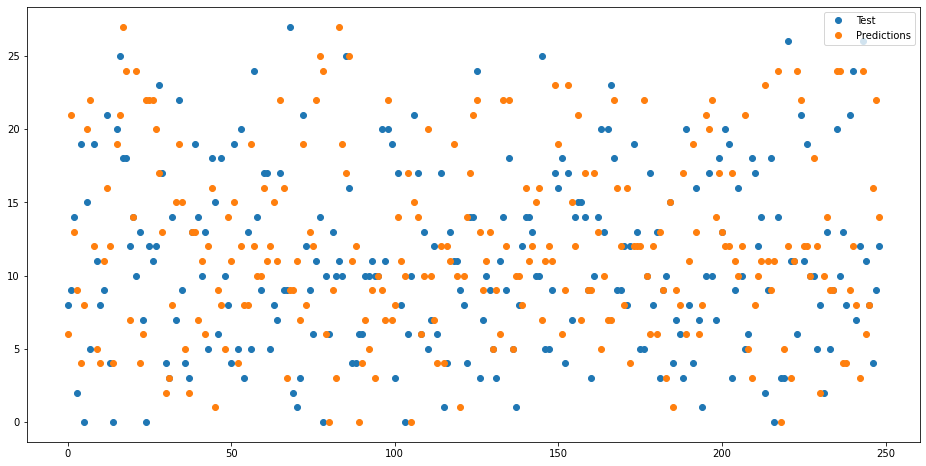

In [289]:
# Graph
plt.figure(figsize=(16,8))

plt.plot((y_test),'o')
plt.plot((y_pred_dt),'o' )
plt.legend(['Test', 'Predictions'], loc='upper right')

In [276]:
# Random Forest Regressor
rf = RandomForestRegressor( max_depth=20,n_estimators=100,random_state=0)
rf.fit(X_train, y_train)
# Prediction on X_test
y_pred_rf = rf.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test,y_pred_rf)
print ('Mean Absolute Error: ' + str(mae_rf) )
rmse_rf = sqrt(mean_squared_error(y_test,y_pred_rf))
print ('Root Mean Sqr Error: ' +  str(rmse_rf))

Mean Absolute Error: 4.631409638554217
Root Mean Sqr Error: 5.875958972233681


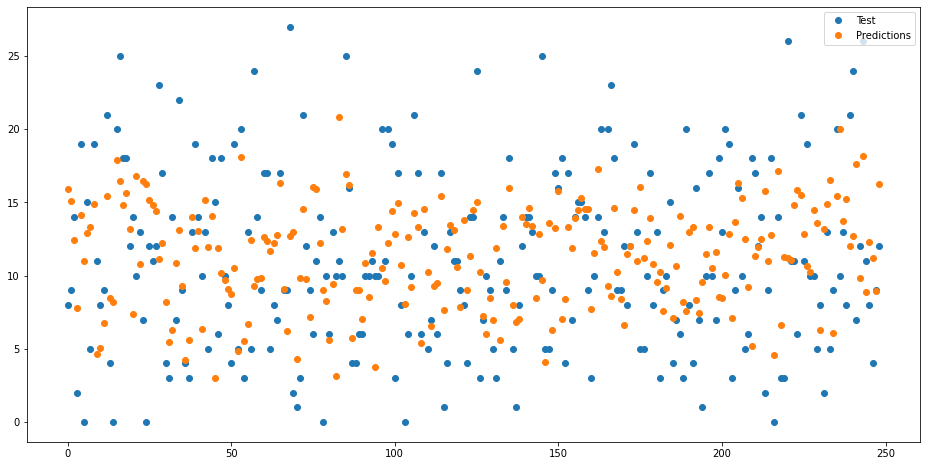

In [277]:
# Graph
plt.figure(figsize=(16,8))

plt.plot((y_test),'o')
plt.plot((y_pred_rf),'o' )
plt.legend(['Test', 'Predictions'], loc='upper right')

In [278]:
# XGBoost Regressor
xgb = GradientBoostingRegressor(alpha=0.9, max_depth=20,n_estimators=100,random_state=0)
xgb.fit(X_train, y_train)
# Prediction on X_test
y_pred_xgb = xgb.predict(X_test)

# Evaluation
mae_xgb = mean_absolute_error(y_test,y_pred_xgb)
print ('Mean Absolute Error: ' + str(mae_xgb) )
rmse_xgb = sqrt(mean_squared_error(y_test,y_pred_xgb))
print ('Root Mean Sqr Error: ' +  str(rmse_xgb))

Mean Absolute Error: 6.0850381740741994
Root Mean Sqr Error: 7.6804470349251295


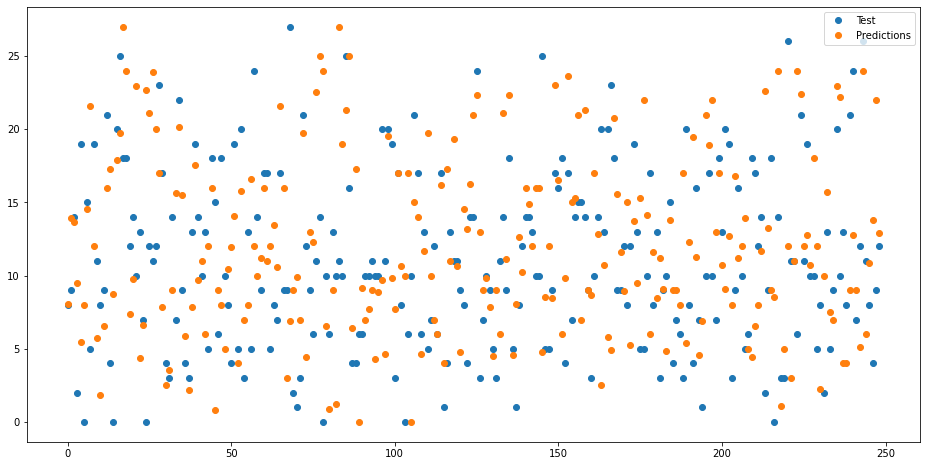

In [279]:
# Graph
plt.figure(figsize=(16,8))

plt.plot((y_test),'o')
plt.plot((y_pred_xgb),'o' )
plt.legend(['Test', 'Predictions'], loc='upper right')

In [281]:
# Support Vector Regressor
svr = svm.SVR(kernel='rbf', gamma='auto' ,C=1.2)
svr.fit(X_train,y_train)
# Prediction on X_test
y_pred_svr = svr.predict(X_test)

# Evaluation
mae_svr =mean_absolute_error(y_test,y_pred_svr)
print ('Mean Absolute Error: ' + str(mae_svr) )
rmse_svr = sqrt(mean_squared_error(y_test,y_pred_svr))
print ('Root Mean Sqr Error: ' +  str(rmse_svr))

Mean Absolute Error: 4.547612781602885
Root Mean Sqr Error: 5.706740187427252


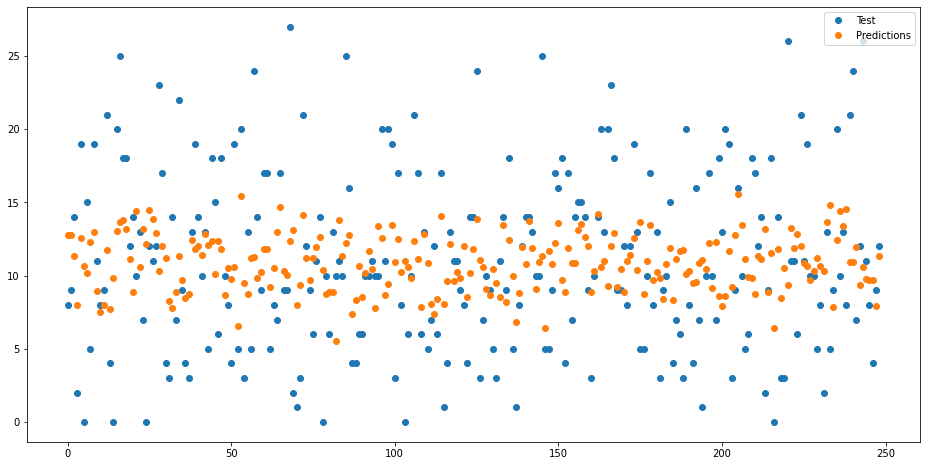

In [282]:
# Graph
plt.figure(figsize=(16,8))

plt.plot((y_test),'o')
plt.plot((y_pred_svr),'o' )
plt.legend(['Test', 'Predictions'], loc='upper right')

In [283]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
# Prediction on X_test
y_pred_lr = lr.predict(X_test)

# Evaluation
mae_lr =mean_absolute_error(y_test,y_pred_lr)
print ('Mean Absolute Error: ' + str(mae_lr) )
rmse_lr = sqrt(mean_squared_error(y_test,y_pred_lr))
print ('Root Mean Sqr Error: ' +  str(rmse_lr))

Mean Absolute Error: 4.599069772042596
Root Mean Sqr Error: 5.804486541445945


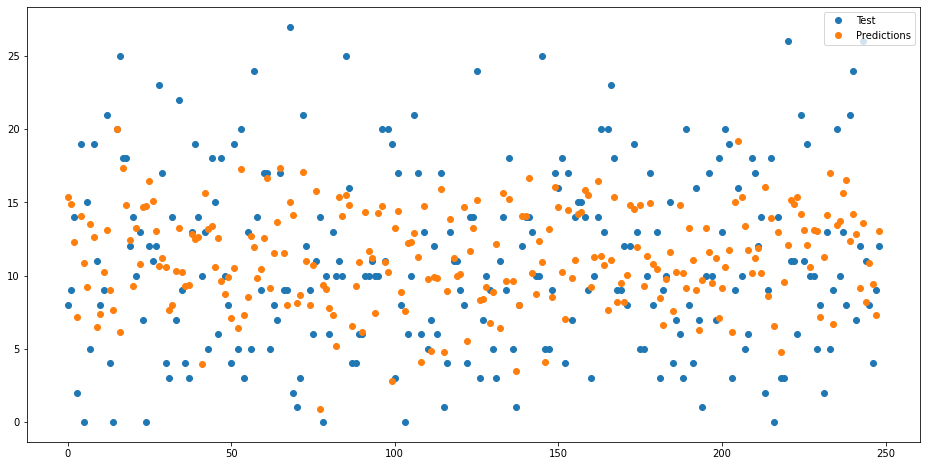

In [284]:
# Graph
plt.figure(figsize=(16,8))

plt.plot((y_test),'o')
plt.plot((y_pred_lr),'o' )
plt.legend(['Test', 'Predictions'], loc='upper right')

Text(0.5, 1.0, 'Mean Absolute Error of Implemented Algirithms')

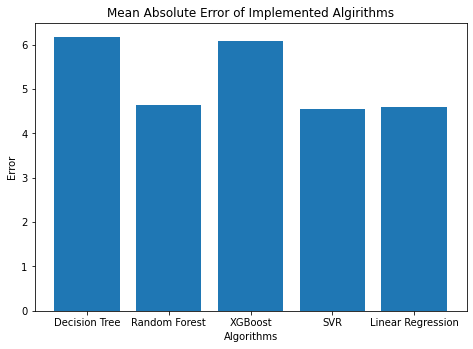

In [290]:
fig = plt.figure()
algo = ['Decision Tree','Random Forest', 'XGBoost', 'SVR', 'Linear Regression']
mae = [mae_dt,mae_rf,mae_xgb,mae_svr,mae_lr]
ax = fig.add_axes([0,0,1,1])
ax.bar(algo,mae)
ax.set_xlabel('Algorithms')
ax.set_ylabel('Error')
ax.set_title('Mean Absolute Error of Implemented Algirithms')

In [291]:
y_pred_rf

array([15.93      , 15.12      , 12.44866667,  7.77      , 14.14666667,
       11.        , 12.9       , 13.33      , 14.89      ,  4.62      ,
        5.04      ,  6.77166667, 15.47      ,  8.44      ,  8.18      ,
       17.91      , 16.45      , 14.85      , 15.65      , 13.19      ,
        7.4       , 16.77      , 10.78      , 16.48      , 16.27      ,
       15.14      , 14.8       , 14.38      , 11.13      , 12.2       ,
        8.17      ,  5.445     ,  6.28      , 10.86      , 13.11      ,
        9.3075    ,  4.21      ,  5.6       , 13.98      , 11.9       ,
       13.07      ,  6.35      , 15.13      , 11.94      , 14.04      ,
        2.99      , 11.87      , 10.2       ,  9.73      ,  9.11      ,
        8.74      , 10.55      ,  4.88      , 18.09      ,  5.515     ,
        6.70166667, 12.41      ,  9.28      ,  9.8       ,  9.84      ,
       12.66      , 12.36      , 11.71      , 12.20916667, 12.77      ,
       16.31      ,  9.1       ,  6.24      , 12.73666667, 12.95

In [293]:
y_test

array([ 8,  9, 14,  2, 19,  0, 15,  5, 19, 11,  8,  9, 21,  4,  0, 20, 25,
       18, 18, 12, 14, 10, 13,  7,  0, 12, 11, 12, 23, 17,  4,  3, 14,  7,
       22,  9,  4,  3, 13, 19, 14, 10, 13,  5, 18, 15,  6, 18, 10,  8,  4,
       19,  5, 20,  3, 13,  5, 24, 14,  9, 17, 17,  5,  8,  7, 17,  9,  9,
       27,  2,  1,  3, 21, 12,  9,  6, 11, 14,  0, 10,  6, 13, 10, 11, 10,
       25, 16,  4,  4,  6,  6, 10, 10, 11, 10, 10, 20, 11, 20, 19,  3, 17,
        8,  0,  6, 10, 21, 17,  6, 13,  5,  7, 12,  6, 17,  1,  4, 13, 11,
       11,  9,  8,  4, 14, 14, 24,  3,  7, 10,  9,  5,  3, 11, 14,  9, 18,
        5,  1,  8, 12, 14, 14, 13, 10, 10, 25,  5,  5,  9, 17, 16, 18,  4,
       17,  7, 14, 15, 15, 14,  9,  3, 10, 14, 20, 13, 20, 23, 18,  9,  9,
       12,  8, 12, 19, 13,  5,  5, 10, 17,  8, 13,  3,  9, 10, 15,  4,  7,
        6,  3, 20,  8,  4, 16,  7,  1, 10, 17, 10,  7, 18, 13, 20, 19,  3,
        9, 16, 10,  5,  6, 18, 17, 12, 14,  2,  9, 18,  0, 14,  3,  3, 26,
       11, 11,  6, 21, 11